<img src="img/vs265header.svg"/>

<h1 align="center"> Lab 1 - Neuron Models <font color="red"> [SOLUTIONS] </font> </h1> 

In [1]:
# KEVIN YU, ID:21984009
# PARTNERS: YOUR PARTNERS HERE
%matplotlib notebook
import pdb
import numpy as np
import matplotlib.pyplot as plt
from utils.lab1_utils import PlotterOne

## 1. Membrane model 

Simulate the RC circuit of the cell membrane to determine how the voltage across the membrane will change in response to a step input current, $I(t)$. Start off by deriving the solution for V(t) from the membrane equation. Then, numerically simulate this solution for a duration of 500 milliseconds with the following parameters:
- Initial Voltage Condition: $V(0) = V_{Leak} = -70 mV$
- Membrane Capacitance: $C_m = 100 pF$
- $ I(t) =
\begin{cases}
100 pA & \text{if  } 0 \leq t \leq 150\\
0 \text{ }pA & \text{otherwise}
\end{cases}
$
- Two different leak conductances: $G_{Leak} = $ (i) $5 nS$, and (ii) $10 nS$.

Plot the results of your simulation. Explain how the different values of $G_{Leak}$ affect the time constant and membrane voltage in your simulation and graph.

<IPython.core.display.Javascript object>


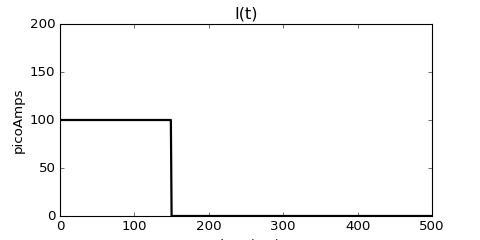

In [2]:
height = 100; stepLength = 150; totalLength = 500
I = np.array([height]*stepLength + [0]*(totalLength-stepLength+1))
plotterOne = PlotterOne(height, totalLength)
plotterOne.plotCurrent(I)

** Derive the solution for V(t) **

Starting from the membrane equation, equating the total current $I(t)$ with the current through the membrane capacitance $C_m \frac{dV}{dt}$ and the current due to ion flow through channels $(V - V_{leak}) G_{leak}$. Because we define $I(t)$ as outward current, the sign of the capacitive and leak currents have the opposite sign.

$I(t) = - C_m \frac{dV}{dt} - \left(V - V_{leak}\right) G_{leak}$

Rearranging for $V$

$V(t) = V_{leak} - \frac{I(t) + C_m\frac{dV}{dt}}{G_{leak}}$

$V(t) = V_{leak} - \frac{I(t)}{G_{leak}} -  \tau\frac{dV}{dt}$

where $\tau = \frac{C_m}{G_{leak}}$ 

Now, we discretize the differential equation into $n$ timesteps and thus approximate the derivative $\frac{dV}{dt}$ as $\frac{V(n+1) - V(n)}{\Delta{t}}$

$V(n) = V_{leak} - \frac{I(n)}{G_{leak}} -  \tau\frac{V(n+1) - V(n)}{\Delta{t}}$

Rearranging for $V(n+1)$

$V(n+1) = \left[ V(n) - V_{leak} + \frac{I(n)}{G_{leak}}\right]\frac{\Delta{t}}{\tau} + V(n)$

$\boxed{ V(n+1) = V(n) \left[1 - \frac{\Delta{t}}{\tau} \right] + V_{leak} \left[ \frac{\Delta{t}}{\tau} \right] - I(n) \Delta{t} }$

In [3]:
def V(I, V0, C, VLeak, GLeak):
    """Return array of V(t) given I(t) by simulating 500 1ms timesteps"""
    VResult = np.zeros(totalLength + 1)
    VResult[0] = V0
    timeConstant = C / GLeak
    dt = 1e-3
    for i in range(totalLength):
        VResult[i+1] = (
            VResult[i] * (1 - (dt/timeConstant)) +
            VLeak * (dt/timeConstant) -
            I[i] * dt / C
        )
    return VResult

<IPython.core.display.Javascript object>


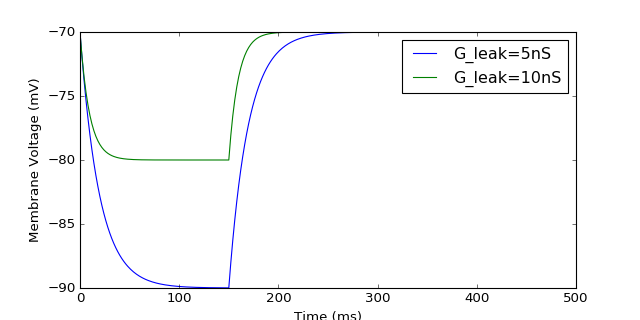

In [4]:
VLeak      = -70e-3  # V - I am converting each constant to MKS during the calculating steps
CMembrane  = 100e-12  # F
plt.figure(figsize=(8,4))
for GLeak in (5,10):
    VMembrane = V(I * 1e-12, VLeak, CMembrane, VLeak, GLeak * 1e-9)
    plotterOne.plotMembraneVoltage(1e3 * VMembrane, GLeak)  # multplied by 1e3 to scale back to mV

** Explanation: **

As current is forced through the membrane for 150ms, the charge can take one of two paths: through the membrane capacitance (modeled as a capacitor with capacitance $C_m$) or through the ion channels.

As current flows the through membrane capacitance, charge builds up on each side to oppose the flow of current through the capcitive membrane. Eventually, the entirety of the current applie flows through the ion channels and the voltage difference settles at a new resting potential set at the potential across the ion channel's equivalent resistor, $\Delta{V} = I/G$. This explains why the memberane with 10nS conductance changes twice as much as the 5nS membrane.

When the current is stops at 150ms, the built up charge on the membrane is discharged in a characteristic exponential and flows through the ion channels in the opposite direction until we reach the original state where $V(t) = V_{leak}$.

## 2. Shunting Inhibition

Now let’s investigate the non-linear interactions that occur as a result of shunting inhibition. Consider a local compartment with sodium and chloride channels (in addition to $G_{Leak}= 5 nS$, and assume $V_{Leak}$ = -70 $mV$). First write down the membrane equation at equilibrium. Next, plot how the membrane voltage will change as you increase the sodium channel conductance alone, with the chloride channel closed. Then do the same for the chloride channel conductance, with the sodium channel closed. Finally, in a second plot, keep the chloride channel at a fixed conductance ($G_{Cl} = 10nS$) and increase the sodium channel conductance. What happens? How does this compare to what you expect from a linear superposition (plot this as a dashed line). Explain your results in terms of how $G_{Na}$ and $G_{Cl}$ affect the equilibrium membrane equation you wrote earlier.

** YOUR LATEX HERE - Write down the membrane equation at equilibrium **

In equilibrium, $\frac{dV}{dt} = 0$, $I = 0$, and the membrane is a weighted average of the ion reversal potentials, weighted by the ion channel conductances.

$V(t) = \frac{V_{leak} G_{leak} + V_{Na} {G_{Na}} + V_{Cl} {G_{Cl}}}{G_{leak} + {G_{Na}} + {G_{Cl}}}$

In [5]:
from utils.lab1_utils import PlotterTwo

In [6]:
def computeVoltage(GNa, GCl):
    """Compute membrane potential in mV given GNa GCl (in siemens)
    
    reversal potential of Na and Cl as +60mV and -61mV respectively
    """
    V_leak = -70
    G_leak = 5e-9
    
    V_Na = 60
    V_Cl = -61
    
    return (
        (V_leak * G_leak + V_Na * GNa + V_Cl * GCl) /
        (G_leak + GNa + GCl)
    )

<IPython.core.display.Javascript object>


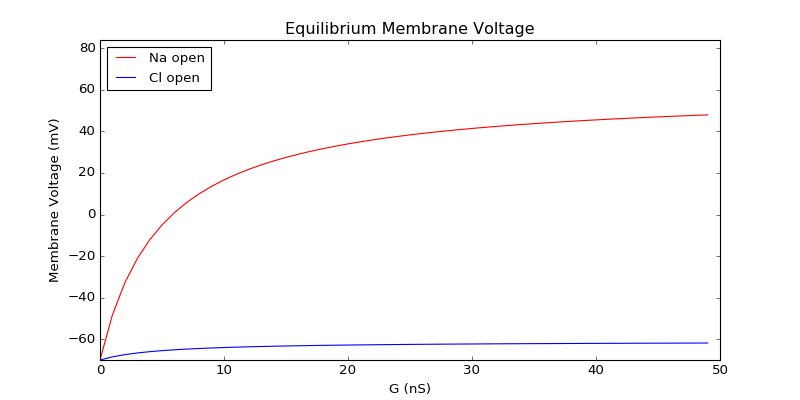

In [7]:
VLeak = -70
VNa = 60
VCl = -61
CMembrane = 100e-12
GLeak = 5e-9
GClFixed = 10e-9

GMax = 50
plotterTwo = PlotterTwo(GMax, VLeak, VNa)

VMemNa = np.zeros(GMax) # Results for opening the Sodium channel
VMemCl = np.zeros(GMax) # Results for opening Chloride channel
VMemNaCl = np.zeros(GMax) # Results for opening Sodium at fixed GCl
VMemLinearNaCl = np.zeros(GMax) # Results for linear prediction
for G in range(GMax):
    VMemNa[G] = computeVoltage(G * 1e-9, 0)
    VMemCl[G] = computeVoltage(0, G * 1e-9)
    VMemNaCl[G] = computeVoltage(G * 1e-9, GClFixed)
    VMemLinearNaCl[G] = (
        ((VLeak * GLeak) + (VNa * G * 1e-9) + (VCl * GClFixed)) / (GLeak + 0 + GClFixed)
    )

plotterTwo.plotEqMembraneVoltage(VMemNa, VMemCl)

<IPython.core.display.Javascript object>


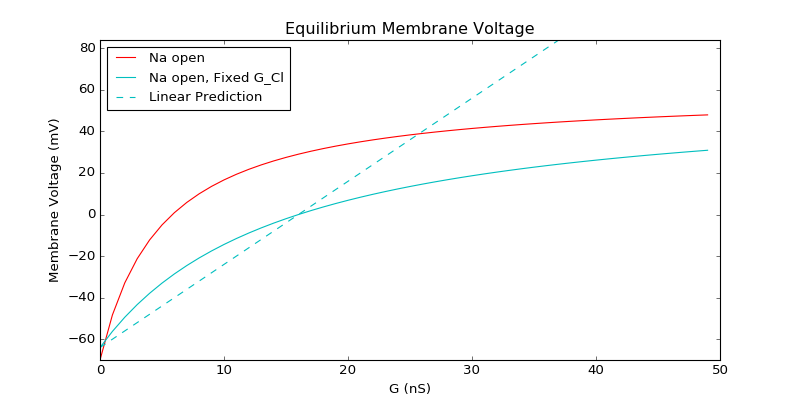

In [70]:
plotterTwo.plotEqMembraneVoltagePrediction(VMemNa, VMemNaCl, VMemLinearNaCl)

** YOUR TEXT HERE - Explain your results **

Opening ion channels increases the conductance for that ion and brings the membrane voltage closer to the reversal potential of that ion. The membrane equation shows that the membrane potential is a weighted average of the reversal potentials of each ion type, weighted by the membrane's condutance to that ion.

The first plot shows how membrane potential approaches the reversal potential for sodium when Na channels are open, and the reversal potential for Chloride when Cl channels are open. The effect saturates once the conductance to that ion is much greater than condutances to other ions.

The second plot demonstrates shunting inhibition. The solid blue curve is the membrane potential as a function of Na conductance while Chloride channels are also open. This curve has a similar shape to the red curve (Cl channels closed), but rises slower due to the effect of the Cl ions trying to keep the membrane potential closer to -61 mV reversal potential of Cl. This is shunting inhibition because even though the Cl reversal potential is greater than the resting potential of the membrane, open Cl channels counteract the effects of open Na channels. This can again be thought of as a weighted average.

The dashed blue line represents the membrane equation if the denominator is held constant allowing for a linear response curve to Na condutance while Cl channels are open. It may be suprising that for low $G_{Na}$, the membrane potential is actually greater than it would be with a linear response; this makes sense though because for low $G_{Na}$, the effect of a larger denominator in the membrane equation actually affects the leak and Cl terms more than the Na term. 